In [9]:
from google.colab import files
uploaded = files.upload()

Saving BullyExplain-updated.xlsx to BullyExplain-updated.xlsx


In [11]:
import pandas as pd

file_path = 'BullyExplain-updated.xlsx'
df = pd.read_excel(file_path, sheet_name='code_mixed_bully_sentiment_emot')
df.head()

,tweet,Bully_Label,Sentiment,Target,Explaine,Unnamed: 5
0,#islamic #kuttiya @MamataOfficial ur pimps ki...,Bully,Negative,Religion,{islamic {kuttiya ur pimps {killed an 85 yrs o...,NaN
1,@Harpreetmandai6 @realSukhiChahal @BJP4Punjab ...,Bully,Negative,Organization,Jadd Bengal ch dastaar lah k {kuttiya si udo t...,NaN
2,@RanaAyyub Yaa u do fake shame no one cares we...,Bully,Negative,Religion,Yaa u do {fake {shame no one cares we cant acx...,NaN
3,@StanningRubina @disha11parmar Rubina supporte...,Bully,Negative,Gender,Rubina supporter talking about voice so funny ...,NaN
4,@aajtak Kuttiya k balatkar k paidais ko encoun...,Bully,Negative,Gender,{Kuttiya k {balatkar k {paidais ko {encounter ...,NaN


In [13]:
print(df.isnull().sum())
df.head()

tweet          0
Bully_Label    0
Sentiment      0
Target         0
Explaine       0
dtype: int64


,tweet,Bully_Label,Sentiment,Target,Explaine
0,#islamic #kuttiya @MamataOfficial ur pimps ki...,Bully,Negative,Religion,{islamic {kuttiya ur pimps {killed an 85 yrs o...
1,@Harpreetmandai6 @realSukhiChahal @BJP4Punjab ...,Bully,Negative,Organization,Jadd Bengal ch dastaar lah k {kuttiya si udo t...
2,@RanaAyyub Yaa u do fake shame no one cares we...,Bully,Negative,Religion,Yaa u do {fake {shame no one cares we cant acx...
3,@StanningRubina @disha11parmar Rubina supporte...,Bully,Negative,Gender,Rubina supporter talking about voice so funny ...
4,@aajtak Kuttiya k balatkar k paidais ko encoun...,Bully,Negative,Gender,{Kuttiya k {balatkar k {paidais ko {encounter ...


In [14]:
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)  # Remove URLs, mentions, hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)        # Remove special characters and numbers
    text = text.lower().strip()                    # Lowercase and strip whitespace
    return text

In [16]:
import re
df['tweet'] = df['tweet'].astype(str)

df['cleaned_tweet'] = df['tweet'].apply(clean_text)

df['label'] = df['Bully_Label'].map({'Non_bully': 0, 'Bully': 1})

df[['tweet', 'cleaned_tweet', 'label']].head()

,tweet,cleaned_tweet,label
0,#islamic #kuttiya @MamataOfficial ur pimps ki...,ur pimps killed an yrs old mahila and a yrs...,1.0
1,@Harpreetmandai6 @realSukhiChahal @BJP4Punjab ...,jadd bengal ch dastaar lah k kuttiya si udo th...,1.0
2,@RanaAyyub Yaa u do fake shame no one cares we...,yaa u do fake shame no one cares we cant acxep...,1.0
3,@StanningRubina @disha11parmar Rubina supporte...,rubina supporter talking about voice so funny ...,1.0
4,@aajtak Kuttiya k balatkar k paidais ko encoun...,kuttiya k balatkar k paidais ko encounter karo...,1.0


In [17]:
df = df[df['label'].notna()].reset_index(drop=True)

X = df['cleaned_tweet'].tolist()
y = df['label'].astype(int).tolist()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))
print("Sample train tweet:", X_train[0])
print("Sample train label:", y_train[0])

Train size: 5146
Test size: 1287
Sample train tweet: poora hafta assignments karta nae hoon aur due date se aik din pehle randi rona zaroori hai
Sample train label: 0


In [ ]:
!pip install torch transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
from transformers import BertTokenizer

MODEL_NAME = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128)

class CyberbullyingDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = CyberbullyingDataset(train_encodings, y_train)
test_dataset = CyberbullyingDataset(test_encodings, y_test)

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

Train dataset size: 5144
Test dataset size: 1287


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float)

from transformers import Trainer
import torch.nn as nn

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = nn.CrossEntropyLoss(weight=class_weights.to(model.device))
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

print("Class weights:", class_weights)
print("CustomTrainer class defined.")


Class weights: tensor([1.0839, 0.9282])
CustomTrainer class defined.


In [ ]:
!pip install torch transformers --quiet

import torch
from transformers import BertForSequenceClassification, TrainingArguments, Trainer, BertTokenizer
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch.nn as nn

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = nn.CrossEntropyLoss(weight=class_weights.to(model.device))
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

train_result = trainer.train()

train_result


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.486300,0.477966,0.806527,0.774752,0.903319,0.834111
2,0.439300,0.521830,0.793318,0.831008,0.773449,0.801196
3,0.420800,0.581915,0.660451,0.941379,0.393939,0.555443
4,0.355000,0.424932,0.830614,0.812912,0.890332,0.849862


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.486300,0.477966,0.806527,0.774752,0.903319,0.834111
2,0.439300,0.521830,0.793318,0.831008,0.773449,0.801196
3,0.420800,0.581915,0.660451,0.941379,0.393939,0.555443
4,0.355000,0.424932,0.830614,0.812912,0.890332,0.849862
5,0.281300,0.468821,0.830614,0.825789,0.868687,0.846695


TrainOutput(global_step=1610, training_loss=0.4288789318215033, metrics={'train_runtime': 713.5051, 'train_samples_per_second': 36.047, 'train_steps_per_second': 2.256, 'total_flos': 1440676916954400.0, 'train_loss': 0.4288789318215033, 'epoch': 5.0})

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

preds_output = trainer.predict(test_dataset)
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = y_test

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Non_bully", "Bully"]))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

   Non_bully       0.86      0.76      0.81       594
       Bully       0.81      0.89      0.85       693

    accuracy                           0.83      1287
   macro avg       0.83      0.83      0.83      1287
weighted avg       0.83      0.83      0.83      1287

Confusion Matrix:
[[452 142]
 [ 76 617]]


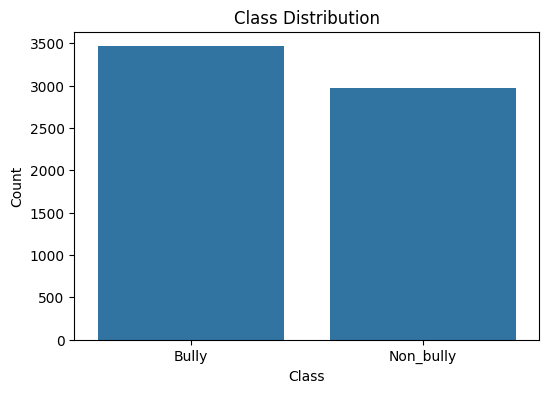

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df['Bully_Label'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

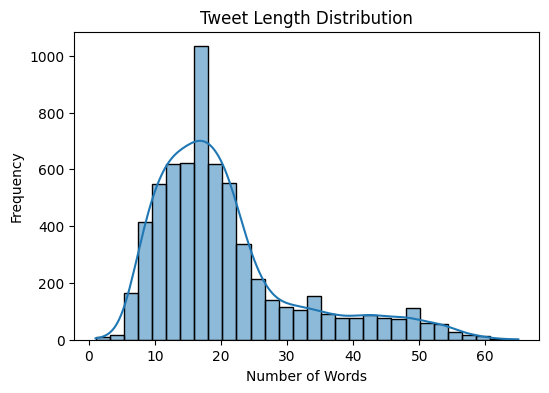

In [ ]:
df['tweet_length'] = df['cleaned_tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6,4))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

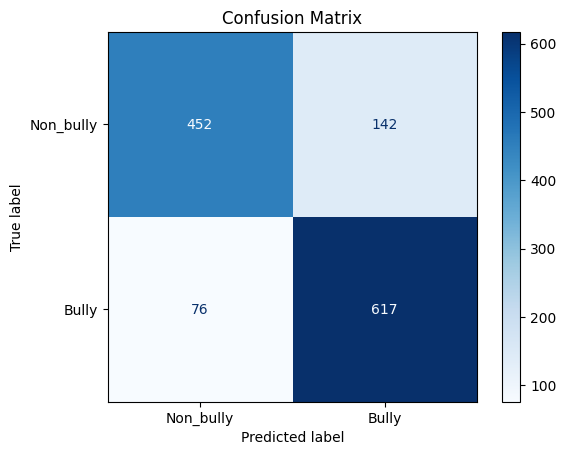

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non_bully", "Bully"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

cr = classification_report(y_test, y_pred, target_names=["Non_bully", "Bully"], output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
cr_df

,precision,recall,f1-score,support
Non_bully,0.856061,0.760943,0.805704,594.000000
Bully,0.812912,0.890332,0.849862,693.000000
accuracy,0.830614,0.830614,0.830614,0.830614
macro avg,0.834486,0.825637,0.827783,1287.000000
weighted avg,0.832827,0.830614,0.829482,1287.000000


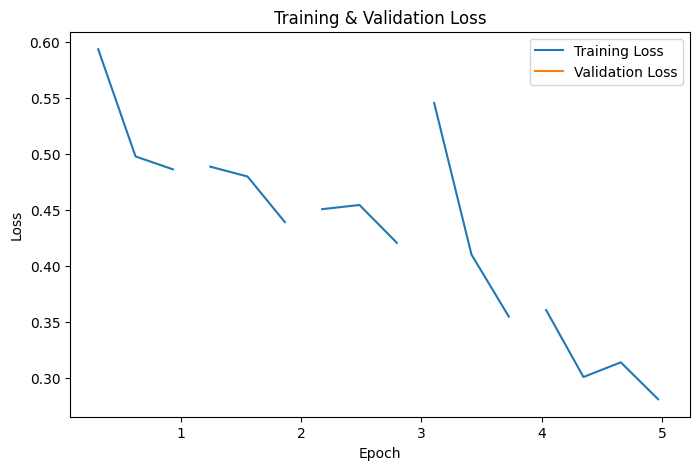

In [ ]:
import pandas as pd

log_hist = pd.DataFrame(trainer.state.log_history)
plt.figure(figsize=(8,5))
plt.plot(log_hist['epoch'], log_hist['loss'], label='Training Loss')
if 'eval_loss' in log_hist.columns:
    plt.plot(log_hist['epoch'], log_hist['eval_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [ ]:
import shutil
shutil.make_archive('best_model', 'zip', './best_model')
from google.colab import files
files.download('best_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
df.to_csv('BullyExplain-Cleaned.csv', index=False)
from google.colab import files
files.download('BullyExplain-Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>